In [24]:
import numpy as np
from numpy import *
import pandas as pd
import h5py
import os
import re
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.signal as signal
import scipy.io as sio
import scipy.stats
from scipy.fft import fft
import neurokit2 as nk
import heartpy as hp
import nolds
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings

In [25]:
import sys
sys.path.append('/Users/jinyanwei/Desktop/BP_Model/Jinyw_code/')
from read_data import open_data

show_order = input('Please input "yes" to show the shape of data, or enter to skip.')
all_data = open_data('/Users/jinyanwei/Desktop/BP_Model/Data/UCI/Part_1.mat', show_order)

In [44]:
import sys
sys.path.append('/Users/jinyanwei/Desktop/BP_Model/Jinyw_code/')
from filter_and_clean_data import clean_data
from segment_and_features import features_data

data_ready = pd.DataFrame()
for patient_number in range(20):
    if len(all_data[patient_number]) > 3000 :
        clean_data(all_data[patient_number], patient_number)
        features_data("/Users/jinyanwei/Desktop/BP_Model/Model_record/cleaned_data", patient_number)
        data_ready = pd.concat([data_ready, pd.read_csv(f'/Users/jinyanwei/Desktop/BP_Model/Model_record/features_data/Part1_feature{patient_number}.csv')])
data_ready.to_csv(f'/Users/jinyanwei/Desktop/BP_Model/Model_record/data_ready{len(data_ready)}.csv')

['7376 beats to train and 1845 beats to test.',
 'Root mean squared error for SBP: 5.242',
 'Root mean squared error for DBP: 3.094',
 'Mean absolute error for SBP: 3.772',
 'Mean absolute error for DBP: 2.199']

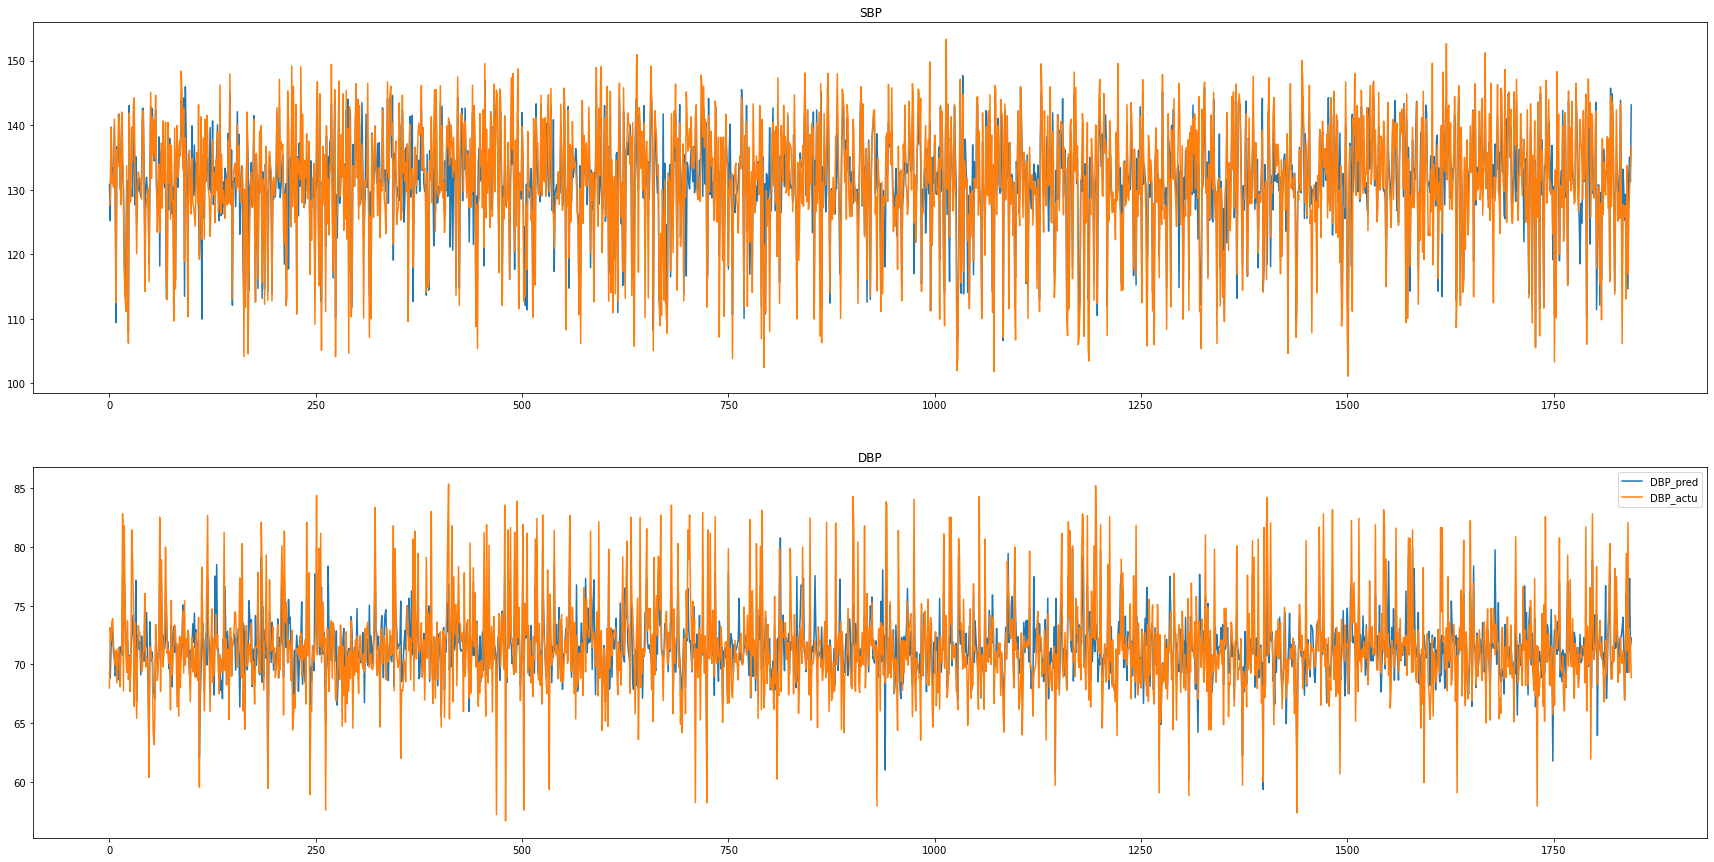

In [45]:
#### Split into training and test sets randomly
df = data_ready
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:-2].values, df.iloc[:, -2:], test_size=0.2, random_state=42)

#### Initialize the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

#### Train the model on the training data
model.fit(X_train, y_train)

#### Predict on the test set
y_pred = model.predict(X_test)

#### Calculate root mean squared error and mean absolute error for both SBP and DBP
rmse_sbp = metrics.mean_squared_error(y_test["SBP"], y_pred[:, 0])**0.5
rmse_dbp = metrics.mean_squared_error(y_test["DBP"], y_pred[:, 1])**0.5
mae_sbp = metrics.mean_absolute_error(y_test["SBP"], y_pred[:, 0])
mae_dbp = metrics.mean_absolute_error(y_test["DBP"], y_pred[:, 1])

result = [
            f'{len(y_train)} beats to train and {len(y_test)} beats to test.', 
            f"Root mean squared error for SBP: {rmse_sbp:.3f}", 
            f"Root mean squared error for DBP: {rmse_dbp:.3f}", 
            f"Mean absolute error for SBP: {mae_sbp:.3f}", 
            f"Mean absolute error for DBP: {mae_dbp:.3f}"
        ]

file_handle = open('/Users/jinyanwei/Desktop/BP_Model/Model_record/random_forest_result.txt', mode='a')
file_handle.write(f'{result}')
file_handle.write('\n')


#### gain BP result df

estimate_bp_df = pd.DataFrame()
estimate_bp_df['SBP_actu'] = y_test['SBP']
estimate_bp_df['SBP_pred'] = y_pred[:, 0]
estimate_bp_df['DBP_actu'] = y_test['DBP']
estimate_bp_df['DBP_pred'] = y_pred[:, 1]
estimate_bp_df.reset_index(drop=True)

#### Draw pictures

plt.figure(figsize=(30, 15))

plt.subplot(2, 1, 1)
x1 = np.array((range(len(estimate_bp_df))))
sbp1 = np.array(estimate_bp_df['SBP_pred'])
sbp2 = np.array(estimate_bp_df['SBP_actu'])
plt.plot(x1, sbp1, label='SBP_pred')
plt.plot(x1, sbp2, label='SBP_actu')
plt.title('SBP')

plt.subplot(2, 1, 2)
x2 = np.array((range(len(estimate_bp_df))))
dbp1 = np.array(estimate_bp_df['DBP_pred'])
dbp2 = np.array(estimate_bp_df['DBP_actu'])
plt.plot(x1, dbp1, label='DBP_pred')
plt.plot(x1, dbp2, label='DBP_actu')
plt.title('DBP')

plt.legend()
result
